<h2 align='center'> Monte Carlo Simulation for Transit Duration Range </h2>

This notebook tries to determine a practical range for transit duration of exoplanets using Monte Carlo Simulations. The formula of maximum transit duration was taken from <a href = 'https://iopscience.iop.org/article/10.3847/1538-3881/ab3984'>Hippke et.al. 2019 </a> :


$$T_{14, max} = (R_s + R_p) \left( \frac{4P}{\pi GM_s} \right)^{1/3}$$

We will further use this in lightcurve trends data.


In [85]:
import numpy as np
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt

In [86]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

In [87]:
"""
      maximum transit duration function

      Parameters:

            R_s (astropy units) : Star Radius in Solar Radius
            R_p (astropy units) : Planet Radius in Earth Radius
            P (astropy units)   : Period in days
            M_s (astropy units) : Stellar Mass in Solar Mass

      Returns:

            t_dur_max (astropy units)   : Transit Duration in seconds
"""
def get_tran_dur_max(R_s, R_p, P, M_s):
  return (R_s.to(u.m) + R_p.to(u.m)) * ((4 * P.to(u.s))/(np.pi * c.G * M_s.to(u.kg)))**(1/3)

In [88]:
# testing

R_star = 1*u.Rsun
R_planet = 0.4*u.Rearth
P = 1*u.day
M_star = 1*u.Msun

t_dur_max = get_tran_dur_max(1*u.Rsun, 0.4*u.Rearth, 1*u.day, 1*u.Msun)


print(f"The maximum transit duration is {t_dur_max} or {t_dur_max.to(u.hour):0.4f}")

The maximum transit duration is 6559.1735884682375 s or 1.8220 h


In [89]:
# Monte Carlo Simulation

N = 10000
star_size = np.random.uniform(0.2, 2, N)*u.Rsun
planet_size = np.random.uniform(1, 11, N)*u.Rearth
planet_period = np.random.uniform(0.8, 15, N)*u.day
star_mass = np.random.uniform(0.2, 2, N)*u.Msun

# calculates N number of transit durations
t_dur = get_tran_dur_max(star_size, planet_size, planet_period, star_mass).to(u.hour)

# minimum value of the calculated transit duration
print(f"The minimum transit duration is {t_dur.min()}")

# maximum value of the calculated transit duration
print(f"The maximum transit duration is {t_dur.max()}")

# mean value of the calculated transit duration
print(f"The mean transit duration is {t_dur.mean()}")

The minimum transit duration is 0.38668567355102085 h
The maximum transit duration is 14.73911796932948 h
The mean transit duration is 4.133282243133802 h


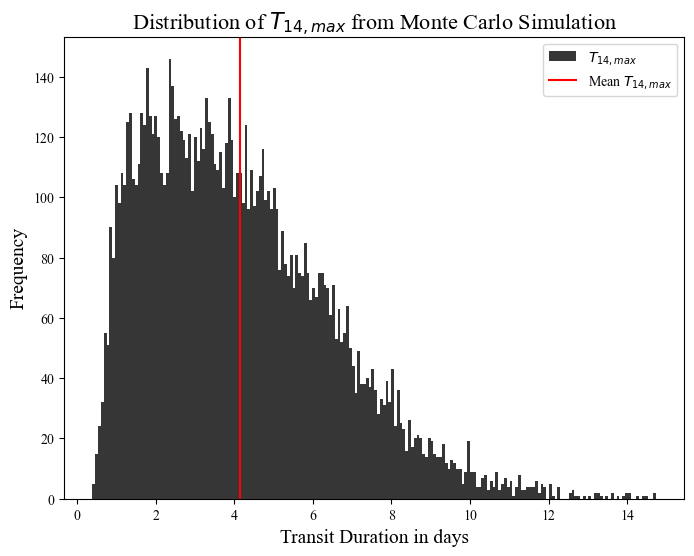

In [90]:
# Visualizing the distribution
plt.figure(figsize=(8,6))
plt.hist(t_dur, bins=200, color='#363636', label = '$T_{14, max}$')
plt.xlabel("Transit Duration in days", fontsize = 14)
plt.ylabel("Frequency",  fontsize = 14)
plt.title("Distribution of $T_{14, max}$ from Monte Carlo Simulation",  fontsize = 16)
plt.axvline(t_dur.mean().value, color='red', label = 'Mean $T_{14, max}$')
plt.legend()
plt.show()